# PYTHON PROGRAMMING BASICS
## COVID-19 Cases

##  Question 1
### a) BMI() that takes as input a person’s height (in inches) and weight (in pounds) computes the person’s BMI and prints an assessment.
### b) acronym() that: takes a phrase (i.e., a string) as input and returns the acronym for the phrase. 

In [1]:
def bmi_intro():
    print("This is a BMI calculator")
    print("Enter your weight and height")
    print("and you can get your Body Mass Index")
    print("Let's Start!\n")
    
def main():
    bmi_intro()
    get_height = 0.0
    get_weight = 0.0
    body_mass_index = 0.0
    get_height = float(input("Enter your height in inches. "))
    get_weight = float(input("Enter your weight in pounds. "))
    body_mass_index = (get_weight * 703) / (get_height ** 2)
    if body_mass_index < 18.5:
        print("Your BMI is " + str(body_mass_index ) + " which is underweight ")
    elif body_mass_index < 24.9:
        print("Your BMI is " + str(body_mass_index ) + " which is normal weight ")
    else:
        print("Your BMI is " + str(body_mass_index ) + " which is overweight ")

main()

This is a BMI calculator
Enter your weight and height
and you can get your Body Mass Index
Let's Start!

Enter your height in inches. 60
Enter your weight in pounds. 68
Your BMI is 13.278888888888888 which is underweight 


In [2]:
def acronym(words):
    acronym = ""
    for word in words.split():
        acronym = acronym + word[0].upper()
    return acronym

def main():
    words = input("Enter your words: ")
    print(acronym(words))
    
if __name__ == "__main__":
    main()

Enter your words: computer science
CS


## Question 2
### Collect data from a publicly available source on COVID19 and write an analysis on COVID19 infections, deaths, recoveries, etc. Explain your data clearly and support your analysis with strong visualizations.

## Links

 1st link:
 Coronavirus Disease (COVID-19). Data Retrieved on 9/10/2020, 14:04. Link to data is https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv

Coronavirus World Aggregated Data Retrieved on 9/10/2020, 14:06. Link to data is link: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv

Owid Covid19 Data retrieved  on 9th October, 14:010. Link is 
https://github.com/owid/covid-19-data/blob/master/public/data/README.md

Our world in data Data retrieved on 10th October, 14:19. 
https://covid.ourworldindata.org/data/ecdc/total_cases.csv

Github corona visrus Data retrieved on 15th October, 09:33. 
https://github.com/CSSEGISandData/COVID-19/commit/b8bb79dacbb29c9b29d12a2f32013808e

## Importing Libraries and Datasets

In [82]:
# Importing relevant libraries
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings 
warnings.filterwarnings('ignore')

In [83]:
# Importing dataset
global_confirmed = pd.read_csv('CSV_Files/covid_19_confirmed.csv', sep=',')
global_deaths = pd.read_csv('CSV_Files/covid_19_deaths.csv', sep=',')
global_recovered = pd.read_csv('CSV_Files/covid_19_recovered.csv', sep=',')
global_aggregated = pd.read_csv('CSV_Files/covid-countries-aggregated.csv', sep=',')
global_latest = pd.read_csv('CSV_Files/10-14-2020.csv')
covid_df = pd.read_csv('CSV_Files/owid-covid-data.csv', sep=',', decimal='.')

## Preparing Datasets

In [84]:
# dropping extra columns form global_latest dataset
global_latest.drop(['FIPS', 'Admin2','Active','Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],axis=1, inplace=True)

In [85]:
# checking for null values in all datasets
global_aggregated.isnull().sum()
global_recovered.isnull().sum()
global_deaths.isnull().sum()
global_confirmed.isnull().sum()
global_latest.isnull().sum()
# filling missing data in all datasets
global_confirmed["Province/State"].fillna("No Province/State", inplace = True) 
global_deaths["Province/State"].fillna("No Province/State", inplace = True)
global_recovered["Province/State"].fillna("No Province/State", inplace = True) 
global_latest["Province_State"].fillna("No Province_State", inplace = True) 

In [86]:
# checking for duplicates
global_aggregated[global_aggregated.duplicated()]
global_confirmed[global_confirmed.duplicated()]
global_deaths[global_deaths.duplicated()]
global_recovered[global_recovered.duplicated()]
global_latest[global_latest.duplicated()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered
697,Alabama,US,2020-10-15 04:24:28,NaN,NaN,0,0,0
942,Colorado,US,2020-10-15 04:24:28,NaN,NaN,0,0,0


In [87]:
# dropping the duplicates present in the dataset global_latest
global_latest.drop_duplicates(keep=False, inplace=True)

# Global Overview

###  Summary (Global)

### Fist of all we will have an overview on the different global covid-19 cases:

In [88]:
# Global Confirmed, Recovered and Deaths Summary
global_data = global_aggregated.copy().drop(['Date','Country'], axis=1)
global_summary = pd.DataFrame(global_data.sum()).transpose()
global_summary.style.format("{:,.0f}")

,Confirmed,Recovered,Deaths
0,"2,744,844,036","1,663,244,727","106,274,595"


In [89]:
# Creating Summary Index of Global Cases for plotting
# Global Confirmed Cases
confirmed_data = global_confirmed.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1)
confirmed_data_summary = confirmed_data.sum()

# Global Deaths Cases
deaths_data = global_deaths.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1)
deaths_data_summary = deaths_data.sum()

# Global Recovered Cases
recovered_data = global_recovered.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1)
recovered_data_summary = recovered_data.sum()

In [81]:
# Plot of Global Confirmed Cases
global_plot = go.Figure(data =go.Scatter(x=confirmed_data_summary.index, y= confirmed_data_summary.values, mode='lines+markers'))
global_plot.update_layout(title='Total Covid-19 Confirmed Globally', 
                        yaxis_title='Confirmed Cases', xaxis_tickangle = 315)
global_plot.show()

In [12]:
# Plot of Global Confirmed, Deaths and Recovered
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed_data_summary.index, y=confirmed_data_summary.values,
                    mode='lines+markers',
                    name='Confirmed'))
fig.add_trace(go.Scatter(x=deaths_data_summary.index, y=deaths_data_summary.values,
                    mode='lines+markers',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=recovered_data_summary.index, y=recovered_data_summary.values,
                    mode='lines+markers', name='Recovered'))

fig.show()

In [13]:
### Explaination for above graph




In [14]:
###  Latest # of confirmed, deaths, recovered and active cases of COVID-19 based on Country
global_latest['Active'] = global_latest['Confirmed'] - global_latest['Deaths'] - global_latest['Recovered']
grouped_data = global_latest.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
print(grouped_data)

         Country_Region  Confirmed  Deaths  Recovered  Active
0           Afghanistan      39994    1481      33354    5159
1               Albania      15955     434       9762    5759
2               Algeria      53584    1827      37603   14154
3               Andorra       3190      59       2011    1120
4                Angola       6846     227       2801    3818
..                  ...        ...     ...        ...     ...
184  West Bank and Gaza      45658     393      39304    5961
185      Western Sahara         10       1          8       1
186               Yemen       2053     596       1329     128
187              Zambia      15616     345      14850     421
188            Zimbabwe       8055     231       7640     184

[189 rows x 5 columns]


Here is a list of all the 189 countries with their Confirmed, Deaths, Recovered and Active cases.



## Top 10 Countries 

In [90]:
# Top 10 countries data of covid-19
confirmed_top_10 = global_aggregated.groupby('Country').max().sort_values(by='Confirmed', ascending=False)[:10]
confirmed_top_10

,Date,Confirmed,Recovered,Deaths
Country,,,,
US,2020-10-08,7605873,3021252,212762
India,2020-10-08,6835655,5827704,105526
Brazil,2020-10-08,5028444,4488092,148957
Russia,2020-10-08,1253603,998197,21939
Colombia,2020-10-08,886179,773973,27180
Argentina,2020-10-08,856369,684844,22710
Spain,2020-10-08,848324,150376,32688
Peru,2020-10-08,835662,728216,33009
Mexico,2020-10-08,804488,682604,83096


We can see from the table that US had the most number of Confirmed cases on October 8th as compared to other countries in the top 10 list.

### Plot (Confirmed Cases)

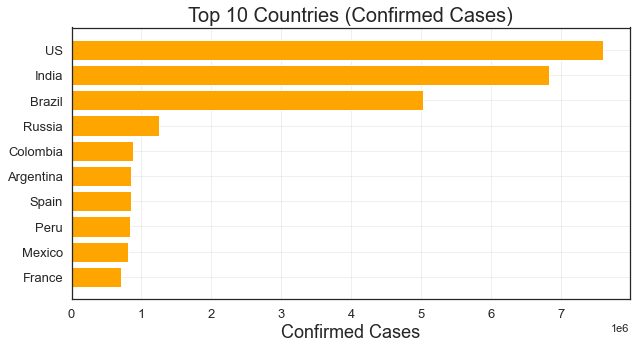

In [91]:
# Plot of Confirmed Cases for Top 10 Countries
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(confirmed_top_10.sort_values('Confirmed')["Confirmed"].index[-10:],confirmed_top_10.sort_values('Confirmed')["Confirmed"].values[-10:],color="orange")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Confirmed Cases).png')

The plot above shows highest to lowest nnumber of Confirmed cases in the top 10 countries, where US stands in first row, India and Brazil stand in second and third rows respectively.

### Plot(Deaths)

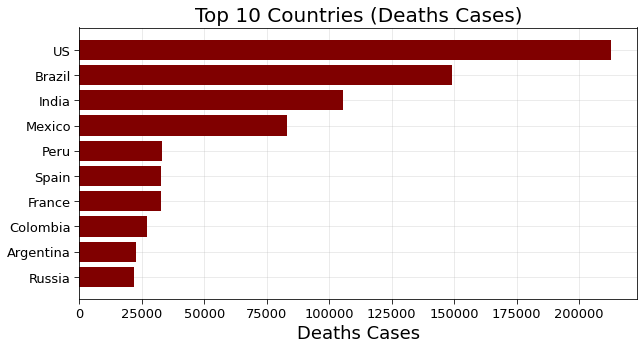

In [18]:
# Plot of Deaths Cases for Top 10 Countries
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(confirmed_top_10.sort_values('Deaths')["Deaths"].index[-10:],confirmed_top_10.sort_values('Deaths')["Deaths"].values[-10:],color="maroon")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Deaths Cases).png')

Where as in this plot it is visible that US still has the highest number of cases, this times in Deaths but Brazil now has the second highest number of Deaths as compared to India.

### Plot (Recovered)

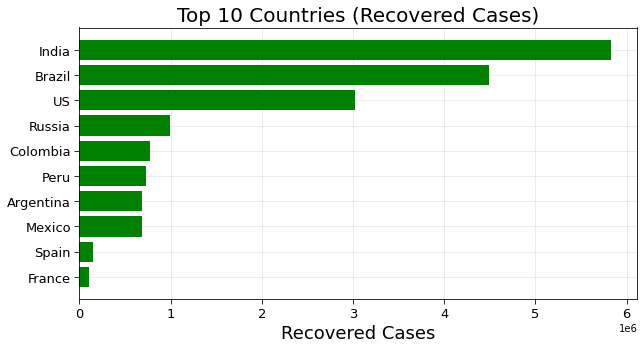

In [19]:
# Plot of Recovered Cases for Top 10 Countries
f = plt.figure(figsize=(10,5))
f.add_subplot(111)
plt.axes(axisbelow=True)
plt.barh(confirmed_top_10.sort_values('Recovered')["Recovered"].index[-10:],confirmed_top_10.sort_values('Recovered')["Recovered"].values[-10:],color="green")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Recovered Cases).png')

This last plot shows the Recovered cases in the top 10 countries and we can see that India has the most no. of Recovered cases and then comes the Brazil. But US now is in the third place and has about half as compared to Indias no. of recovered cases.

### Lets see what is the condition in US for different cases:

## USA Covid-19 Cases

In [20]:
# Extracting the US confirmed, deaths and recovered cases based on its States
us_state_data = global_latest[global_latest['Country_Region']=='US']
us_state_data = us_state_data[['Province_State', 'Confirmed', 'Deaths', 'Recovered']]
final_data_us = us_state_data.sort_values(by='Confirmed', ascending=False)
final_data_us = final_data_us.reset_index(drop=True)
print(final_data_us)

      Province_State  Confirmed  Deaths  Recovered
0         California     285016    6812          0
1            Florida     176271    3485          0
2           Illinois     157573    5321          0
3              Texas     152623    2698          0
4            Arizona     147551    3475          0
...              ...        ...     ...        ...
3261    Pennsylvania          0       0          0
3262       Recovered          0       0    3155794
3263       Wisconsin          0       0          0
3264  South Carolina          0       0          0
3265        New York          0      22          0

[3266 rows x 4 columns]


The above table shows the Confirmed, Deaths and Recovered Cases in US based on its Provinces.

In [92]:
# to visualize the state/province wise death cases of Coronavirus in USA.
us_data = global_latest[global_latest['Country_Region']=='US'].drop(['Country_Region','Lat', 'Long_'], axis=1)
us_data = us_data[us_data.sum(axis = 1) > 0]
us_data = us_data.groupby(['Province_State'])['Deaths'].sum().reset_index()
us_data_death = us_data[us_data['Deaths'] > 0]
state_fig = px.bar(us_data_death, x='Province_State', y='Deaths', title='COVID-19 Cases based on Province in US', text='Deaths')
state_fig.show()

In [24]:
# confirmed, deaths, recovered COVID-19 cases in US
global_latest['Active'] = global_latest['Confirmed'] - global_latest['Deaths'] - global_latest['Recovered']
combine_us_data = global_latest[global_latest['Country_Region']=='US'].drop(['Country_Region','Lat', 'Long_'], axis=1)
combine_us_data = combine_us_data[combine_us_data.sum(axis = 1) > 0]
combine_us_data = combine_us_data.groupby(['Province_State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
combine_us_data = pd.melt(combine_us_data, id_vars='Province_State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], value_name='Count', var_name='Case')
us_plot = px.bar(combine_us_data, x='Province_State', y='Count', text='Count', barmode='group', color='Case', title='Confirmed, Deaths, Recovered and Active COVID-19 cases based on Province in Us');
us_plot.show()

In [25]:
#### Explaination of the above Graph



## Glimps on Norway

In [26]:
# Summary of Cases
global_confirmed[global_confirmed['Country/Region']=="Norway"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
196,No Province/State,Norway,60.472,8.4689,0,0,0,0,0,0,...,12276,12393,12498,12644,12769,12858,12897,13005,13153,13277


In [27]:
# Norway Confirmed, Deaths and Recoverd Cases
confirmed_norway = global_aggregated[global_aggregated['Country']=="Norway"]
deaths_norway = global_aggregated[global_aggregated['Country']=="Norway"]
recovered_norway = global_aggregated[global_aggregated['Country']=="Norway"]

In [28]:
confirmed_norway.head()

,Date,Country,Confirmed,Recovered,Deaths
33408,2020-01-22,Norway,0,0,0
33409,2020-01-23,Norway,0,0,0
33410,2020-01-24,Norway,0,0,0
33411,2020-01-25,Norway,0,0,0
33412,2020-01-26,Norway,0,0,0


In [29]:
deaths_norway.head()

,Date,Country,Confirmed,Recovered,Deaths
33408,2020-01-22,Norway,0,0,0
33409,2020-01-23,Norway,0,0,0
33410,2020-01-24,Norway,0,0,0
33411,2020-01-25,Norway,0,0,0
33412,2020-01-26,Norway,0,0,0


In [30]:
recovered_norway.head()

,Date,Country,Confirmed,Recovered,Deaths
33408,2020-01-22,Norway,0,0,0
33409,2020-01-23,Norway,0,0,0
33410,2020-01-24,Norway,0,0,0
33411,2020-01-25,Norway,0,0,0
33412,2020-01-26,Norway,0,0,0


### Latest Data Summary of Covid-19 Cases

In [31]:
# Norway Confirmed, Recovered and Deaths Summary (Based on latest data)
norway_data = global_latest[global_latest['Country_Region']=='Norway']
norway_data = norway_data[['Province_State', 'Confirmed', 'Deaths', 'Recovered']]
final_data = norway_data.sort_values(by='Confirmed', ascending=False)
final_data = final_data.reset_index(drop=True)
print(final_data)

      Province_State  Confirmed  Deaths  Recovered
0  No Province_State      15953     277      11863


Above is the summary of all Cases of Covid-19 in Norway 

## Question 3. Explore Exam_Data (csv is provided) and address the following five questions:
### a. Read the csv file into a Pandas DataFrame.
### b. Explore, clean and transform the dataset if necessary. Handle missing values using different data strategies. Justify your choices.
### c. Calculate additional measures like BMI.
### d. Perform Exploratory Data Analysis, plot visualizations using Seaborn (e.g. scatter plot, Box-Whisker plot, Pair plot, Correlation Matrix, violin plot, etc.) and explain your interpretations.
### e. Employ multi-linear regression and kNN algorithm to predict the weight of the person. Discuss and explain the results.

# Importing Dataset and Libraries

In [32]:
# importing relevant libraries
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
sns.set(style="white", color_codes =True)
%matplotlib inline


from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [33]:
# importing the dataset
weight_data = pd.read_csv("weight_data.csv", sep=',', decimal='.')

# Cleaning Data

In [34]:
# showing head of the dataset
weight_data.head()

,Age,Sex,Weight,Height
0,30.0,Female,70.4,177.0
1,30.0,Male,78.0,182.0
2,32.0,Female,63.2,169.0
3,32.0,Female,63.2,169.0
4,32.0,Male,69.2,174.0


In [35]:
# getting info of dataset
weight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1004 non-null   float64
 1   Sex     1008 non-null   object 
 2   Weight  985 non-null    float64
 3   Height  1004 non-null   float64
dtypes: float64(3), object(1)
memory usage: 31.6+ KB


In [36]:
# describing dataset
weight_data.describe()

,Age,Weight,Height
count,1004.000000,985.000000,1004.000000
mean,45.179283,67.373909,172.525896
std,4.726596,5.829516,5.565913
min,30.000000,50.600000,155.000000
25%,42.000000,63.200000,169.000000
50%,45.000000,67.000000,173.000000
75%,48.000000,71.400000,176.000000
max,60.000000,84.600000,188.000000


In [37]:
# checking for null values
weight_data.isnull().sum()

Age        4
Sex        0
Weight    23
Height     4
dtype: int64

In [38]:
# taking mean of the Age, Height and Weight columns for later filling the null values
age_mean = weight_data["Age"].mean()
height_mean = weight_data["Height"].mean()
height_mean = weight_data["Weight"].mean()

In [39]:
# # replacing null values in Age, Height and Weight using "mean method"
weight_data["Age"].fillna(age_mean, inplace = True) 
weight_data["Height"].fillna(height_mean, inplace = True) 
weight_data["Weight"].fillna(height_mean, inplace = True) 

In [40]:
# rounding the decimal in column "Age"
weight_data = weight_data.round({'Age': 0})

In [41]:
# converting Height to meters and calculating and adding BMI to the data
weight_data["Height_m"] = weight_data["Height"] /100
weight_data['BMI'] = weight_data['Weight']/(weight_data['Height_m']**2)

In [42]:
# Introducing Status column
def convert_status_to_description(x):
    if x['BMI'] <= 18:
        return 'Extremely Weak'
    elif x['BMI'] <= 19.5:
        return 'Weak'
    elif x['BMI'] <= 25:
        return 'Normal'
    elif x['BMI'] <=29.9:
        return 'Overweight'
    elif x['BMI']== 30:
        return 'Obesity'
    elif x['BMI'] >= 32:
        return 'Extreme Obesity'
weight_data['Status'] = weight_data.apply(convert_status_to_description,axis=1)
weight_data.head()

,Age,Sex,Weight,Height,Height_m,BMI,Status
0,30.0,Female,70.4,177.0,1.77,22.471193,Normal
1,30.0,Male,78.0,182.0,1.82,23.547881,Normal
2,32.0,Female,63.2,169.0,1.69,22.128077,Normal
3,32.0,Female,63.2,169.0,1.69,22.128077,Normal
4,32.0,Male,69.2,174.0,1.74,22.856388,Normal


In [43]:
# assigning values 0 and 1 to 'Male' and 'Female' respectively
def convert_sex_to_label(x):
    if x['Sex'] == 'Male':
        return 1
    elif x['Sex'] == 'Female':
        return 0
weight_data['Sex_lbl'] = weight_data.apply(convert_sex_to_label,axis=1)
weight_data.head()

,Age,Sex,Weight,Height,Height_m,BMI,Status,Sex_lbl
0,30.0,Female,70.4,177.0,1.77,22.471193,Normal,0
1,30.0,Male,78.0,182.0,1.82,23.547881,Normal,1
2,32.0,Female,63.2,169.0,1.69,22.128077,Normal,0
3,32.0,Female,63.2,169.0,1.69,22.128077,Normal,0
4,32.0,Male,69.2,174.0,1.74,22.856388,Normal,1


In [44]:
# Checking for dtypes of the columns
weight_data.dtypes

Age         float64
Sex          object
Weight      float64
Height      float64
Height_m    float64
BMI         float64
Status       object
Sex_lbl       int64
dtype: object

# Corrrelation Matrix

In [45]:
# calculating the correlation matrix
corr = weight_data.corr()

# displaying the correlation matrix
display(corr)

,Age,Weight,Height,Height_m,BMI,Sex_lbl
Age,1.000000,-0.009793,0.058671,0.058671,-0.077882,0.000000
Weight,-0.009793,1.000000,0.625771,0.625771,0.064616,0.557592
Height,0.058671,0.625771,1.000000,1.000000,-0.729362,0.288438
Height_m,0.058671,0.625771,1.000000,1.000000,-0.729362,0.288438
BMI,-0.077882,0.064616,-0.729362,-0.729362,1.000000,0.053536
Sex_lbl,0.000000,0.557592,0.288438,0.288438,0.053536,1.000000


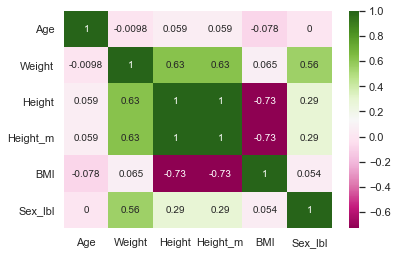

In [46]:
# plotting the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='PiYG')

# Performing the Multilinear Regression

## Build the Model

In [48]:
# creating dependent and inpdependet variables
X = weight_data[['Age','Height','Sex_lbl','BMI']]
y = weight_data['Weight']

In [49]:
# splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
# Pass through the X_train and y_train data set
regressor.fit(X_train, y_train)

LinearRegression()

## Exploring the Output

In [51]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
# show the first 5 predictions
y_pred[:5]

array([70.67447227, 65.11400315, 63.65253715, 74.4284111 , 71.53652013])

In [52]:
# calculating score
score= r2_score(y_test,y_pred)
score

0.9895628338679927

## Measures of Error

In [53]:
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_pred)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_pred)

# calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

# displaying the results
print("MSR {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSR 0.385
MAE 0.394
RMSE 0.621


In [54]:
# A more popular metric R2
model_r2 = r2_score(y_test, y_pred)
print("R2:{:.2}".format(model_r2))

R2:0.99


In [55]:
# Intercept and Coefficients
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 -106.15763781858759
Coefficients: 
 [-0.00899818  0.90508109  1.25528591  0.75980246]


In [56]:
# plot
fig = px.scatter_3d(weight_data, x='Age', y='Height', z='Weight',
              color='Sex')
fig.show()

In [57]:
model = LinearRegression()
model.fit(X, y)

colors = ['Positive' if c > 0 else 'Negative' for c in model.coef_]

fig = px.bar(
    x=X.columns, y=model.coef_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight'
)
fig.show()

# KNN Regression

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


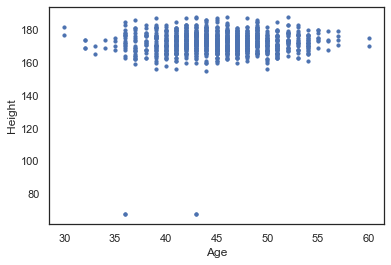

In [58]:
weight_data.plot(kind='scatter', x='Age', y='Height', s=10);

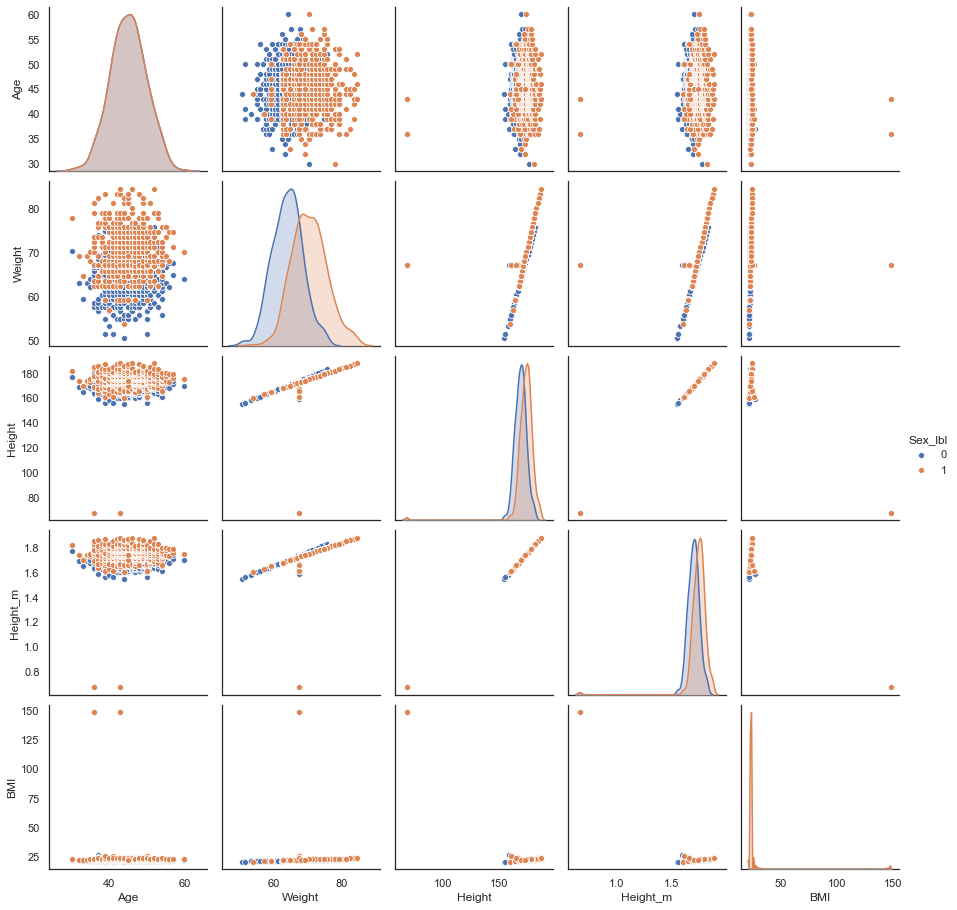

In [59]:
p=sns.pairplot(weight_data, hue = 'Sex_lbl');

## Splitting Dataset

In [60]:
# Splitting the data set to training set and test set
train_set, test_set = train_test_split(weight_data, test_size = 0.2, random_state=0)  # % data ratio can be changed here

In [61]:
# Classifying the predictor(X) and target(y)
X_train = train_set[['Age','Height','BMI','Sex_lbl']]
y_train = train_set["Weight"]

X_test = test_set[['Age','Height','BMI','Sex_lbl']]
y_test = test_set["Weight"]

In [62]:
# starting the KNN regressor and fitting training data
reg = KNeighborsRegressor(n_neighbors=8)
#Train the model using the training sets
reg.fit(X_train, y_train.astype('int'))

KNeighborsRegressor(n_neighbors=8)

In [63]:
# Predicting weight for the test set
y_pred = reg.predict(X_test)

In [64]:
# writting the predicted weight back to the test_set to compute
test_set['Predicted_Weight']= y_pred

In [65]:
test_set

,Age,Sex,Weight,Height,Height_m,BMI,Status,Sex_lbl,Predicted_Weight
800,49.0,Female,70.4,177.0,1.77,22.471193,Normal,0,71.000
311,43.0,Female,65.0,171.0,1.71,22.229062,Normal,0,65.000
85,39.0,Male,62.6,168.0,1.68,22.179705,Normal,1,62.250
435,44.0,Female,74.0,181.0,1.81,22.587833,Normal,0,75.250
204,41.0,Male,71.4,176.0,1.76,23.050103,Normal,1,70.875
...,...,...,...,...,...,...,...,...,...
783,49.0,Male,65.9,171.0,1.71,22.536849,Normal,1,65.125
231,42.0,Female,63.2,169.0,1.69,22.128077,Normal,0,63.000
5,32.0,Male,69.2,174.0,1.74,22.856388,Normal,1,68.250
452,45.0,Female,56.0,161.0,1.61,21.604105,Normal,0,55.500


No handles with labels found to put in legend.


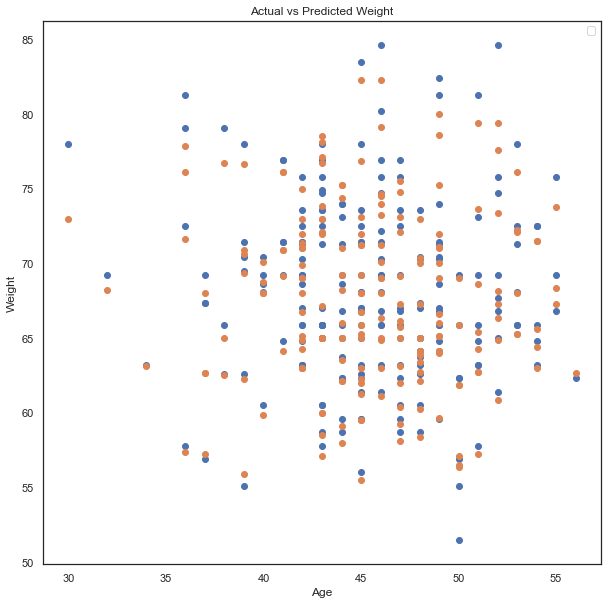

In [66]:
# Visualizing the Predictions vs Actual Observations
plt.figure(figsize = (10,10))
plt.title('Actual vs Predicted Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.scatter(list(test_set["Age"]),list(test_set["Weight"]))
plt.scatter(list(test_set["Age"]),list(test_set["Predicted_Weight"]))
plt.show()

The blue points are the actual weights as observed and the orange dots shows the predicted weights

No handles with labels found to put in legend.


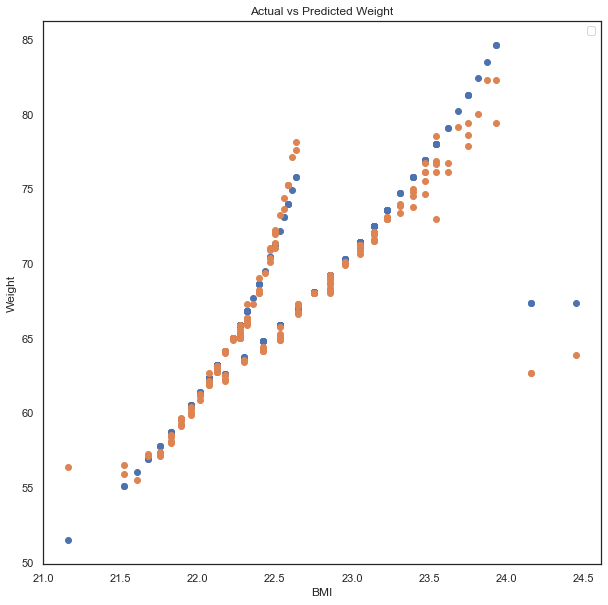

In [67]:
# Visualizing the Predictions vs Actual Observations
plt.figure(figsize = (10,10))
plt.title('Actual vs Predicted Weight')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.legend()
plt.scatter(list(test_set["BMI"]),list(test_set["Weight"]))
plt.scatter(list(test_set["BMI"]),list(test_set["Predicted_Weight"]))
plt.show()

The blue points are the actual weights as observed and the orange dots shows the predicted weights

In [68]:
# r2 score
print(r2_score(y_test,y_pred))

0.9632047960351804


Let's estimate, how accurately the classifier or model can predict the type of cultivars. Accuracy can be computed by comparing actual test set values and predicted values.

In [69]:
## Check performance using accuracy (Test)
reg.score(X_test, y_test)

0.9632047960351804

In [70]:
## Check performance using accuracy (Train)
reg.score(X_train, y_train)

0.9718089690232841

In [71]:
# Lets check how well our trained model perform in predicting the labels of the cross validation data.
predict=reg.predict(X_test)
print("Accuracy={}%".format((sum(y_test==predict)/y_test.shape[0])*100))

Accuracy=3.9603960396039604%


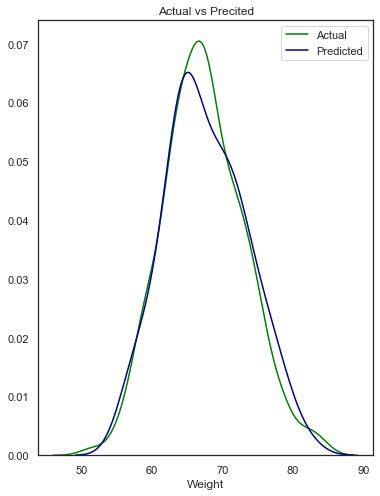

In [72]:
# Plotting Actual against Predicted
plt.figure(figsize=(6, 8))


ax = sns.distplot(weight_data['Weight'], hist=False, color="green", label="Actual")
sns.distplot(y_pred, hist=False, color="darkblue", label="Predicted" , ax=ax)


plt.title('Actual vs Precited')
plt.show()
plt.close()